In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
array1=pd.read_csv("timeserie2.csv")

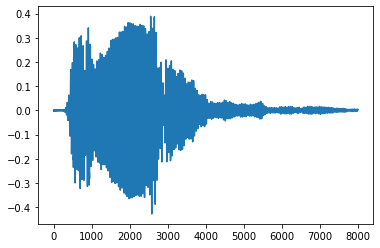

In [3]:
plt.plot(array1)

In [4]:
xx=array1.values.T


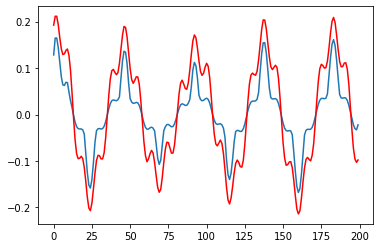

In [182]:
myfilt=signal.wiener(xx)
myfilt
fig=plt.plot(myfilt.T)
plt.plot(xx.T,c='r')

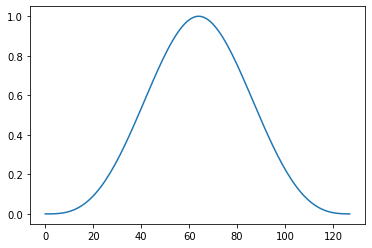

In [5]:
mywindow=signal.get_window('bohman',128)
plt.plot(mywindow)

In [6]:
fs=2e6
windowlength=1024
mywindow=signal.get_window('hamming',windowlength)
f, t, Sxx = signal.spectrogram(xx, fs,window=mywindow,noverlap=1010,nfft=1024,nperseg=windowlength)
Sxx.shape
Syy=20*np.log10(np.abs(Sxx))
Syy=Syy[0,:,:]
print(Syy.shape)
print ('Freq resolution:', f[1], 'Time Resolution:', t[1])

(513, 499)
Freq resolution: 1953.125 Time Resolution: 0.000263


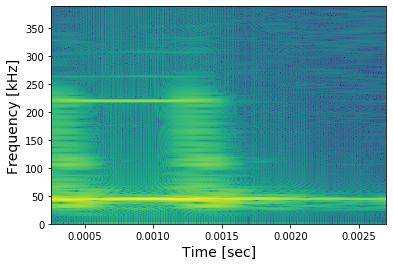

In [7]:
plt.pcolormesh(t[:350],f[:200]/1e3,Syy[:200,:350])
plt.ylabel('Frequency [kHz]', fontsize=14)
plt.xlabel('Time [sec]',fontsize=14)
plt.savefig('spectrogram_dual_frequency.png')